In [ ]:
! apt update
! apt install libgl1-mesa-glx -y

In [4]:
import cv2
import torch
from detectron2.modeling import build_model
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.config import get_cfg
from detectron2.engine import default_argument_parser, default_setup
from detectron2.projects.point_rend import add_pointrend_config
from detectron2 import model_zoo

/home/songjian/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
torch.cuda.is_available()

True

In [3]:
def setup(args):
    """
    Create configs and perform basic setups.
    """
    cfg = get_cfg()
    cfg.MODEL.DEVICE = "cpu"
    add_pointrend_config(cfg)
    cfg.merge_from_file(args.config_file)
    cfg.merge_from_list(args.opts)
    cfg.freeze()
    default_setup(cfg, args)
    return cfg


def generate_model(args):
    cfg = setup(args)
    model = build_model(cfg)
    DetectionCheckpointer(model, save_dir=cfg.OUTPUT_DIR).resume_or_load(
        cfg.MODEL.WEIGHTS, resume=args.resume
    )
    return model

In [4]:
sys.argv = ['--config-file' ,"config.yaml"]
args = default_argument_parser().parse_args()

In [5]:
args.config_file = "config.yaml"
args.eval_only = True
args.opts = []
args.resume=True

args

Namespace(config_file='config.yaml', dist_url='tcp://127.0.0.1:49152', eval_only=True, machine_rank=0, num_gpus=1, num_machines=1, opts=[], resume=True)

In [7]:
model = generate_model(args)

[07/21 09:04:33 detectron2]: Rank of current process: 0. World size: 1
[07/21 09:04:33 detectron2]: Environment info:
----------------------  ---------------------------------------------------------------------------
sys.platform            linux
Python                  3.8.1 (default, Dec 19 2019, 23:53:51) [GCC 5.4.0 20160609]
numpy                   1.22.3
detectron2              0.6 @/home/songjian/detectron2/detectron2
Compiler                GCC 5.4
CUDA compiler           CUDA 9.2
detectron2 arch flags   6.1
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.9.0+cu102 @/home/songjian/.local/lib/python3.8/site-packages/torch
PyTorch debug build     False
GPU available           Yes
GPU 0                   Tesla P4 (arch=6.1)
Driver version          460.67
CUDA_HOME               /usr/local/cuda
Pillow                  9.2.0
torchvision             0.10.0+cu102 @/home/songjian/.local/lib/python3.8/site-packages/torchvision
torchvision arch flags  3.5, 5.0, 6.0, 7.0, 7.5


In [43]:
image = cv2.imread('451a3969afd55702e750a4b4cd10481958a2fc6ed39fd083f55d4182bf88826d.jpg', cv2.IMREAD_COLOR)
image = image[:,:,::-1].transpose((2,0,1))

In [44]:
model.eval()

tensor = torch.from_numpy(image.copy())

data = [{"image": tensor}]

with torch.no_grad():
    # cv2.r
    out_data = model(data)

In [45]:
instance = out_data[0]['instances']

In [46]:
tmp = image[:,:,::-1].transpose((1,2,0))

In [51]:
cfg = setup(args)

[07/21 09:17:00 detectron2]: Rank of current process: 0. World size: 1
[07/21 09:17:01 detectron2]: Environment info:
----------------------  ---------------------------------------------------------------------------
sys.platform            linux
Python                  3.8.1 (default, Dec 19 2019, 23:53:51) [GCC 5.4.0 20160609]
numpy                   1.22.3
detectron2              0.6 @/home/songjian/detectron2/detectron2
Compiler                GCC 5.4
CUDA compiler           CUDA 9.2
detectron2 arch flags   6.1
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.9.0+cu102 @/home/songjian/.local/lib/python3.8/site-packages/torch
PyTorch debug build     False
GPU available           Yes
GPU 0                   Tesla P4 (arch=6.1)
Driver version          460.67
CUDA_HOME               /usr/local/cuda
Pillow                  9.2.0
torchvision             0.10.0+cu102 @/home/songjian/.local/lib/python3.8/site-packages/torchvision
torchvision arch flags  3.5, 5.0, 6.0, 7.0, 7.5


In [52]:
from detectron2.data import MetadataCatalog

In [53]:
metadata = MetadataCatalog.get(
            cfg.DATASETS.TEST[0] if len(cfg.DATASETS.TEST) else "__unused"
        )

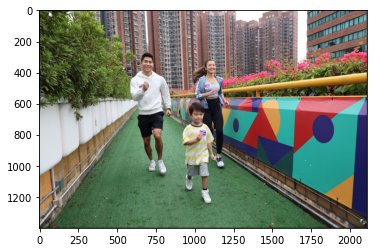

In [54]:
plt.imshow(tmp)

In [55]:
torch.cuda.get_device_name(0)

'Tesla P4'

In [56]:
from detectron2.utils.visualizer import Visualizer

v = Visualizer(
        tmp[:, :, ::-1], 
        metadata=metadata, 
        scale=0.8,
        )

for box in out_data[0]["instances"].pred_boxes.to('cpu'):
    v.draw_box(box)
    v.draw_text(str(box[:2].numpy()), tuple(box[:2].numpy()))
    
v = v.get_output()
img =  v.get_image()[:, :, ::-1]

In [57]:
from IPython.display import display

In [2]:
from PIL import Image

In [3]:
Image.fromarray(img)

NameError: name 'img' is not defined